In [ ]:
# Import packages
import numpy as np
import pandas as pd
import gensim
from gensim.models import KeyedVectors
from gensim.models import Word2Vec
from google.colab import drive
from numpy import dot
from numpy.linalg import norm

In [ ]:
## Mount drive
drive.mount('/content/drive')

## Define data locations
model_path = 'path to models folder'
block1 = '1618_1791_preprocessed_word2vec'
block2 = '1792_1870_preprocessed_word2vec'
block3 = '1870_1960_preprocessed_word2vec'
block4 = '1960_1990_preprocessed_word2vec'

data_path = 'path to save output files'

Mounted at /content/drive


The 160 most frequent occurring adjectives in Dutch were used which can be found in Tiberius, C., & Schoonheim, T. (2013). A frequency dictionary of dutch: core vocabulary for learners. Routledge.

In [ ]:
df = pd.read_csv(data_path+"adjectives.csv", header=None)

In [ ]:
adjectives = df.values.tolist()
adjectives = [item for sublist in adjectives for item in sublist] # flatten list
len(adjectives)

160

In [ ]:
female_words = ['zij','dochter','dochtertje','haar','moeder','moedertje','vrouw',
                   'vrouwtje','meid','meisje','zijzelf','vrouwelijk','zus','zussen',
                   'dochters','vrouwen','moeders','meisjes','tante','tantes','nicht',
                   'nichtje','nichten','zusje','vrā','vrau','vrauwen', 'vrouen','vroutje',
                   "vrouw'","vroue","vrouws","vrouwtjens",'frou','frouwe',
                   'zide','zije','zoe','zouw','zu','sy','moer','goemem','meisken',
                   'suske','kleindochter','kleindochtertje','oma','grootmoeder',
                   'grootmoedertje','omaatje','grootmama','otema','otemoe','omoe',
                   'grootemoeder','mama','haers','haer','haere','si','omoe','omie']

                   # Get total vocabulary of all 4 embeddings

male_words = ['hij', 'zoon', 'zoontje','zoons','hem','zijn','man','mannetje',
                 'vader','vadertje','papa','jongen','jongeman','jongetje','mannelijk',
                 'hemzelf','broer','broeder','broertje','zonen','vaders','mannen',
                 'broers','oom','ooms','neef','neefje','neven','neefjes','jongetjes',
                 'jongens','zoontjes', 'hy','soan','him','sijns','hi','mans','fader',
                 'jonge','jonghe','jonghen','jongske','jochie','jŏ',"jō",'joon','jongers',
                 'broersch','broedersch','broêr','broêrtje','broederken','noom','iem',
                 'ome','omke','omme','neve','achterneef', 'achterneefje','opa','opoe',
                 'grootevader','grootvader','grootvaar','grootpapa','opie']

total_vocab = []
for block in [block1, block2, block3, block4]:

  embedding = model_path+block+".wordvectors"
  vectors = KeyedVectors.load(embedding, mmap='r')

  # get vocabulary
  vocabulary = vectors.vocab
  total_vocab.append(vocabulary)

# Get total male/female words present in all vocabularies
male_words_nl = []
female_words_nl = []
for group in [male_words, female_words]:
  for word in group:
    if word in total_vocab[0] and word in total_vocab[1] and word in total_vocab[2] and word in total_vocab[3]: #if the word is present in all 4 vocabularies
      if group == male_words:
        male_words_nl.append(word)
      else:
        female_words_nl.append(word)

# get total adjectives present in all vocabularies
adjectives_nl = []
for ad in adjectives:
  if ad in total_vocab[0] and ad in total_vocab[1] and ad in total_vocab[2] and ad in total_vocab[3]:
    adjectives_nl.append(ad)

print(len(female_words_nl))
print(len(male_words_nl))
print(len(adjectives_nl))
print(female_words_nl)
print(male_words_nl)
print(adjectives_nl)  

32
39
134
['zij', 'dochter', 'dochtertje', 'haar', 'moeder', 'vrouw', 'vrouwtje', 'meid', 'meisje', 'zus', 'dochters', 'vrouwen', 'moeders', 'meisjes', 'tante', 'tantes', 'nicht', 'nichten', 'zusje', 'vrau', 'vrouws', 'frou', 'zoe', 'zu', 'sy', 'moer', 'oma', 'grootmoeder', 'mama', 'haer', 'haere', 'si']
['hij', 'zoon', 'zoontje', 'zoons', 'hem', 'man', 'mannetje', 'vader', 'papa', 'jongen', 'jongetje', 'broer', 'broeder', 'broertje', 'zonen', 'vaders', 'mannen', 'broers', 'oom', 'ooms', 'neef', 'neven', 'jongetjes', 'jongens', 'zoontjes', 'hy', 'him', 'hi', 'mans', 'jonge', 'joon', 'noom', 'iem', 'ome', 'omme', 'neve', 'opa', 'grootvader', 'opie']
['goed', 'ander', 'groot', 'heel', 'nieuw', 'lang', 'echt', 'eigen', 'zeker', 'klein', 'oud', 'hoog', 'vorig', 'gewoon', 'snel', 'jong', 'mogelijk', 'laatst', 'geleden', 'nodig', 'bekend', 'kort', 'vroeg', 'mooi', 'sterk', 'vrij', 'ver', 'zwaar', 'vast', 'slecht', 'laat', 'vol', 'hard', 'afgelopen', 'volledig', 'half', 'open', 'bezig', 'extr

In [ ]:
def cos_sim(a,b):
  return dot(a, b)/(norm(a)*norm(b))

sim_scores = []
for block in [block1, block2, block3, block4]:
  embedding = model_path+block+".wordvectors"
  vectors = KeyedVectors.load(embedding, mmap='r')
  
  # get mean female vector
  all_fem_vecs = []
  for word in female_words_nl:
    vec = vectors[word]
    all_fem_vecs.append(vec)
  fem_array = [np.array(x) for x in all_fem_vecs]
  mean_fem_vec = [np.mean(k) for k in zip(*fem_array)]

  # get vectors of adjectives
  all_ad_vecs = []
  for ad in adjectives_nl:
    vec = vectors[ad]
    all_ad_vecs.append(vec)
  
  # compare similarity of mean female vector to adjectives
  sim = []
  for vect in all_ad_vecs:
    similarity = cos_sim(vect, mean_fem_vec)
    sim.append(similarity)
  sim_scores.append(sim)

In [ ]:
# Add words to similarity scores
sim_word1 = []
for sim, ad in zip(sim_scores[0],adjectives_nl):
  sim_word1.append((sim, ad))
sim_word1 = sorted(sim_word1,reverse=True, key=lambda x: x[0])

sim_word2 = []
for sim, ad in zip(sim_scores[1],adjectives_nl):
  sim_word2.append((sim, ad))
sim_word2 = sorted(sim_word2,reverse=True, key=lambda x: x[0])

sim_word3 = []
for sim, ad in zip(sim_scores[2],adjectives_nl):
  sim_word3.append((sim, ad))
sim_word3 = sorted(sim_word3,reverse=True, key=lambda x: x[0])

sim_word4 = []
for sim, ad in zip(sim_scores[3],adjectives_nl):
  sim_word4.append((sim, ad))
sim_word4 = sorted(sim_word4,reverse=True, key=lambda x: x[0])

# print top 10 adjectives most similar to women
print("Block 1")
print(sim_word1[0:10])
print("----------")
print("Blok 2")
print(sim_word2[0:10])
print("----------")
print("Blok 3")
print(sim_word3[0:10])
print("----------")
print("Blok 4")
print(sim_word4[0:10])




Block 1
[(0.4319512, 'simpel'), (0.4270047, 'geboren'), (0.41788182, 'dood'), (0.38002023, 'jong'), (0.3793077, 'gelukkig'), (0.3731351, 'fijn'), (0.3724167, 'ander'), (0.36788008, 'schoon'), (0.36326173, 'zeker'), (0.35989806, 'vroeg')]
----------
Blok 2
[(0.42763177, 'lief'), (0.37188646, 'aardig'), (0.36793867, 'ziek'), (0.3611329, 'dood'), (0.35561115, 'toevallig'), (0.3541326, 'boos'), (0.33395496, 'mooi'), (0.33306432, 'simpel'), (0.33041805, 'koud'), (0.32762423, 'bang')]
----------
Blok 3
[(0.5024235, 'lief'), (0.4845538, 'jong'), (0.4496467, 'vroeg'), (0.4474184, 'blij'), (0.44371572, 'boos'), (0.43512505, 'zacht'), (0.431786, 'gek'), (0.4281326, 'mooi'), (0.42466456, 'aardig'), (0.41594672, 'dood')]
----------
Blok 4
[(0.46310538, 'dood'), (0.45990175, 'lief'), (0.42811134, 'zacht'), (0.4226572, 'aardig'), (0.4156337, 'gek'), (0.41127113, 'mooi'), (0.4086858, 'gelukkig'), (0.4068489, 'leuk'), (0.40590912, 'blij'), (0.4053938, 'knap')]


In [ ]:
# Get lists of most similar words per time period
def get_list(simlist):
  words = []
  for tup in simlist[0:10]:
    words.append(tup[1])
  return words

print(get_list(sim_word1))
print(get_list(sim_word2))
print(get_list(sim_word3))
print(get_list(sim_word4))

['simpel', 'geboren', 'dood', 'jong', 'gelukkig', 'fijn', 'ander', 'schoon', 'zeker', 'vroeg']
['lief', 'aardig', 'ziek', 'dood', 'toevallig', 'boos', 'mooi', 'simpel', 'koud', 'bang']
['lief', 'jong', 'vroeg', 'blij', 'boos', 'zacht', 'gek', 'mooi', 'aardig', 'dood']
['dood', 'lief', 'zacht', 'aardig', 'gek', 'mooi', 'gelukkig', 'leuk', 'blij', 'knap']


## Male adjectives

In [ ]:
def cos_sim(a,b):
  return dot(a, b)/(norm(a)*norm(b))

sim_scores = []
for block in [block1, block2, block3, block4]:
  embedding = model_path+block+".wordvectors"
  vectors = KeyedVectors.load(embedding, mmap='r')
  
  # get mean male vector
  all_male_vecs = []
  for word in male_words_nl:
    vec = vectors[word]
    all_male_vecs.append(vec)
  male_array = [np.array(x) for x in all_male_vecs]
  mean_male_vec = [np.mean(k) for k in zip(*male_array)]

  # get vectors of adjectives
  all_ad_vecs = []
  for ad in adjectives_nl:
    vec = vectors[ad]
    all_ad_vecs.append(vec)
  
  # compare similarity of mean female vector to adjectives
  sim = []
  for vect in all_ad_vecs:
    similarity = cos_sim(vect, mean_male_vec)
    sim.append(similarity)
  sim_scores.append(sim)

In [ ]:
# Add words to similarity scores
sim_word1 = []
for sim, ad in zip(sim_scores[0],adjectives_nl):
  sim_word1.append((sim, ad))
sim_word1 = sorted(sim_word1,reverse=True, key=lambda x: x[0])

sim_word2 = []
for sim, ad in zip(sim_scores[1],adjectives_nl):
  sim_word2.append((sim, ad))
sim_word2 = sorted(sim_word2,reverse=True, key=lambda x: x[0])

sim_word3 = []
for sim, ad in zip(sim_scores[2],adjectives_nl):
  sim_word3.append((sim, ad))
sim_word3 = sorted(sim_word3,reverse=True, key=lambda x: x[0])

sim_word4 = []
for sim, ad in zip(sim_scores[3],adjectives_nl):
  sim_word4.append((sim, ad))
sim_word4 = sorted(sim_word4,reverse=True, key=lambda x: x[0])

# print top 10 adjectives most similar to women
print("Block 1")
print(sim_word1[0:10])
print("----------")
print("Blok 2")
print(sim_word2[0:10])
print("----------")
print("Blok 3")
print(sim_word3[0:10])
print("----------")
print("Blok 4")
print(sim_word4[0:10])

Block 1
[(0.4479292, 'dood'), (0.429504, 'jong'), (0.42710084, 'ander'), (0.41120318, 'schoon'), (0.4101549, 'simpel'), (0.40203288, 'geboren'), (0.39303076, 'laat'), (0.38957584, 'vroeg'), (0.3773443, 'zeker'), (0.37454918, 'wakker')]
----------
Blok 2
[(0.41853958, 'dood'), (0.3756498, 'lief'), (0.3643917, 'jong'), (0.35769525, 'aardig'), (0.35744333, 'toevallig'), (0.35230973, 'ziek'), (0.34862024, 'geboren'), (0.33559695, 'gelukkig'), (0.3335427, 'ander'), (0.33194998, 'koud')]
----------
Blok 3
[(0.502192, 'jong'), (0.46842134, 'lief'), (0.44784397, 'dood'), (0.4412644, 'gek'), (0.43554744, 'geboren'), (0.4339112, 'laatst'), (0.43051776, 'vroeg'), (0.42064705, 'ziek'), (0.41779286, 'blij'), (0.41605783, 'boos')]
----------
Blok 4
[(0.5224744, 'dood'), (0.43657094, 'geboren'), (0.42355412, 'aardig'), (0.405916, 'vroeg'), (0.40183333, 'laatst'), (0.40155545, 'gek'), (0.39730388, 'lief'), (0.3930191, 'blij'), (0.38944483, 'ziek'), (0.37654948, 'boos')]


In [ ]:
# Get lists of most similar words per time period
def get_list(simlist):
  words = []
  for tup in simlist[0:10]:
    words.append(tup[1])
  return words

print(get_list(sim_word1))
print(get_list(sim_word2))
print(get_list(sim_word3))
print(get_list(sim_word4))

['dood', 'jong', 'ander', 'schoon', 'simpel', 'geboren', 'laat', 'vroeg', 'zeker', 'wakker']
['dood', 'lief', 'jong', 'aardig', 'toevallig', 'ziek', 'geboren', 'gelukkig', 'ander', 'koud']
['jong', 'lief', 'dood', 'gek', 'geboren', 'laatst', 'vroeg', 'ziek', 'blij', 'boos']
['dood', 'geboren', 'aardig', 'vroeg', 'laatst', 'gek', 'lief', 'blij', 'ziek', 'boos']


## Wordlcoud

In [ ]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

In [ ]:
# Run for female

bl1 = ['simpel', 'geboren', 'dood', 'jong', 'gelukkig', 'fijn', 'ander', 'schoon', 'zeker', 'vroeg']
bl2 = ['lief', 'aardig', 'ziek', 'dood', 'toevallig', 'boos', 'mooi', 'simpel', 'koud', 'bang']
bl3 = ['lief', 'jong', 'vroeg', 'blij', 'boos', 'zacht', 'gek', 'mooi', 'aardig', 'dood']
bl4 = ['dood', 'lief', 'zacht', 'aardig', 'gek', 'mooi', 'gelukkig', 'leuk', 'blij', 'knap']
all = ('simpel', 'geboren', 'dood', 'jong', 'gelukkig', 'fijn', 'ander', 'schoon', 'zeker', 'vroeg', 'lief', 'aardig', 'ziek', 'dood', 'toevallig', 'boos', 'mooi', 'simpel', 'koud', 'bang','lief', 'jong', 'vroeg', 'blij', 'boos', 'zacht', 'gek', 'mooi', 'aardig', 'dood','dood', 'lief', 'zacht', 'aardig', 'gek', 'mooi', 'gelukkig', 'leuk', 'blij', 'knap')
df = pd.DataFrame({'block1': bl1})
df['block2'] = bl2
df['block3'] = bl3
df['block4'] = bl4
#df['all'] = all

In [ ]:
# Run for male
all = ['dood', 'jong', 'ander', 'schoon', 'simpel', 'geboren', 'laat', 'vroeg', 'zeker', 'wakker','dood', 'lief', 'jong', 'aardig', 'toevallig', 'ziek', 'geboren', 'gelukkig', 'ander', 'koud','jong', 'lief', 'dood', 'gek', 'geboren', 'laatst', 'vroeg', 'ziek', 'blij', 'boos','dood', 'geboren', 'aardig', 'vroeg', 'laatst', 'gek', 'lief', 'blij', 'ziek', 'boos']

In [ ]:
str1 = " "
str1=str1.join(all)


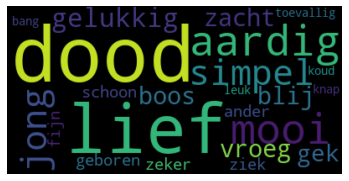

In [ ]:
# Start with one review:
text = str1

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

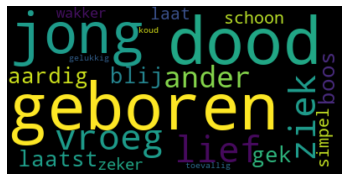

In [ ]:
# Start with one review:
text = str1

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()